<a href="https://colab.research.google.com/github/gongx030/Etv2_pioneer/blob/master/Enriched_heatmap_of_Etv2_chip_seq_data_and_Brg1_floxed_Brg1_KO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this notebook is to look at the chromatin acccessibility of  Brg1 and Brg1 KO samples. We use the ChIP data to see the enriched heatmap for etv2 binding sites obtained from the ATAC seq union peakset to see the Etv2 binding sites and the chromatin acessibility for Brg1 and Brg1 KO

In [1]:
start_time0 <- Sys.time()

# Download external packages

In [2]:
system('apt-get -q install libgsl-dev', intern = TRUE)
system('apt-get install libcairo2-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

# Downloading R libraries required for our analysis

In [3]:
install.packages(c('gsl', 'devtools'))
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'chromVAR', 'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'BiocParallel', 'SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'dplyr', 'GenomicRanges', 'DESeq2'
))
devtools::install_github("GreenleafLab/chromVARmotifs")
devtools::install_github("jokergoo/ComplexHeatmap")
devtools::install_github("jokergoo/EnrichedHeatmap")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("gsl", "devtools")):
“installation of package ‘gsl’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'dplyr'”
Installing package(s) 'BiocVersion', 'chromVAR',
  'BSgenome.Mmusculus.UCSC.mm10', 'motifmatchr', 'BiocParallel',
  'SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'GenomicRanges',
  'DESeq2'

also installing the dependencies ‘pracma’, ‘R.oo’, ‘R.methodsS3’, ‘png’, ‘rjson’, ‘GenomicAlignments’, ‘reshape2’, ‘poweRlaw’, ‘GO.db’, ‘R.utils’, ‘KEGGREST’, ‘plog

openssl (1.4.3 -> 1.4.5) [CRAN]
vroom   (1.5.4 -> 1.5.5) [CRAN]


Installing 2 packages: openssl, vroom

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmp8KfKrX/remotes4063f0a0e3/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’
─  preparing ‘chromVARmotifs’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘chromVARmotifs_0.2.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




iterators  (NA -> 1.0.13) [CRAN]
foreach    (NA -> 1.5.1 ) [CRAN]
doParallel (NA -> 1.0.16) [CRAN]
clue       (NA -> 0.3-59) [CRAN]
GetoptLong (NA -> 1.0.5 ) [CRAN]


Installing 5 packages: iterators, foreach, doParallel, clue, GetoptLong

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmp8KfKrX/remotes406732b1df/jokergoo-ComplexHeatmap-a9d34f2/DESCRIPTION’
─  preparing ‘ComplexHeatmap’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘ComplexHeatmap_2.9.4.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Cairo (NA -> 1.5-12.2) [CRAN]


Installing 1 packages: Cairo

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/Rtmp8KfKrX/remotes40186433a7/jokergoo-EnrichedHeatmap-da26038/DESCRIPTION’
─  preparing ‘EnrichedHeatmap’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Removed empty directory ‘EnrichedHeatmap/test’
─  building ‘EnrichedHeatmap_1.21.2.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Loading R libraries used for the analysis

In [4]:
library(chromVAR)
library(chromVARmotifs)
library(BSgenome.Mmusculus.UCSC.mm10)
library(motifmatchr)
library(SummarizedExperiment)
library(gplots)
library(circlize)
library(plyr)
library(dplyr)
library(GenomicRanges)
library(stringr)
library(EnrichedHeatmap)



Loading required package: BSgenome

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attac

# Reading the Brg1, Brg1KO and Etv2 NULL peaks to get a granges object for our analysis

In [5]:
s3_bed_files <- c('Etv2_Null_D4' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=vezf1_version=20210629a/Etv2Null_EB_D4_summits.bed',
  'Brg1_floxed' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_D4_summits.bed',
  'Brg1_KO' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_4OHT_D4_summits.bed'

  )

In [6]:
gr_list <- lapply(1:length(s3_bed_files), function(i){
  x <- read.table(s3_bed_files[i], header = FALSE, sep = '\t')
  gr <- GRanges(seqnames = x[, 1], range = IRanges(x[, 2], x[, 3]), peak_id = x[, 4], score = x[, 5])
  gr$source <- names(s3_bed_files)[i]
  gr
})

In [7]:
gr <- Reduce('c', gr_list)
gr <- resize(gr, width = 200, fix = 'center')
gr0 <- reduce(gr) # a reduced set of Etv2 peak
mm <- as.matrix(findOverlaps(gr, gr0))
sp <- split(mm[, 1], list(mm[, 2]))
j <- unlist(mclapply(sp, function(i) i[which.max(gr$score[i])], mc.cores = 4))
gr <- gr[j]
G <- do.call('cbind', lapply(1:length(s3_bed_files), function(i) gr %over% gr_list[[i]]))
gr$group <- G # group assignment of the union set to each source
colnames(gr$group) <- names(s3_bed_files)
gr



GRanges object with 55771 ranges and 4 metadata columns:
          seqnames            ranges strand |                peak_id     score
             <Rle>         <IRanges>  <Rle> |            <character> <numeric>
      [1]     chr1   3191797-3191996      * | /scratch.global/dsou..  37.41800
      [2]     chr1   3270696-3270895      * | /scratch.global/dsou..   3.69438
      [3]     chr1   3549509-3549708      * | /scratch.global/dsou..  10.98640
      [4]     chr1   3670707-3670906      * | /scratch.global/dsou..  13.05630
      [5]     chr1   3671738-3671937      * | /scratch.global/dsou..  42.97480
      ...      ...               ...    ... .                    ...       ...
  [55767]     chrY 90825242-90825441      * | /scratch.global/dsou..   9.37631
  [55768]     chrY 90827093-90827292      * | /scratch.global/dsou..  29.20100
  [55769]     chrY 90827682-90827881      * | /scratch.global/dsou..   5.08537
  [55770]     chrY 90828833-90829032      * | /scratch.global/dsou..   9.8

# Using the Positional weight matrix to get the etv2 motif binding sites for the union ATAC-seq peakset that will be used for getting the coverage at Etv2 binding sites

In [8]:
data('homer_pwms')

In [9]:
etv2_binding <-  matchMotifs(
homer_pwms[['Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)']], 
resize(gr, width = 200, fix = 'center'),
genome = BSgenome.Mmusculus.UCSC.mm10,
p.cutoff = 5e-05,
out = 'positions'
)[[1]]

In [10]:
etv2_binding

GRanges object with 3269 ranges and 1 metadata column:
         seqnames            ranges strand |     score
            <Rle>         <IRanges>  <Rle> | <numeric>
     [1]     chr1   4571746-4571757      - |   8.53911
     [2]     chr1   4613617-4613628      + |   8.31727
     [3]     chr1   4785700-4785711      - |   8.35742
     [4]     chr1   7271644-7271655      + |   7.93122
     [5]     chr1 13494963-13494974      - |   7.97285
     ...      ...               ...    ... .       ...
  [3265]     chrY 90740084-90740095      + |   8.02772
  [3266]     chrY 90761509-90761520      + |   8.65738
  [3267]     chrY 90761531-90761542      + |   7.87205
  [3268]     chrY 90828986-90828997      + |   8.65738
  [3269]     chrY 90829008-90829019      + |   7.87205
  -------
  seqinfo: 22 sequences from an unspecified genome; no seqlengths

# Downloading pileup files to obtain read and process the count data from ATAC seq

In [11]:
bw_files <- c('EB_Dox_3h_Etv2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/EB_Dox_3h_Etv2_FE.bw',
  'EB_Dox_12h_Etv2' = 'https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/EB_Dox_12h_Etv2_FE.bw',
  'Etv2_Null_D4' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=vezf1_version=20210629a/Etv2Null_EB_D4_treat_pileup.bw',
  'Brg1_floxed' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_D4_treat_pileup.bw',
  'Brg1_KO' = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Etv2_PioneerFactor_Manuscript/Brg1-floxed_4OHT_D4_treat_pileup.bw')

In [12]:
local_bw_files <- gsub('https://s3.msi.umn.edu/', './', bw_files)
commands <- sprintf('wget -x -c -nH %s', bw_files)
res <- lapply(commands, function(command) system(command))
stopifnot(all(file.exists(local_bw_files)))

# Normalizing matrix for the Enriched heatmap +/-1 KB of Etv2 binding sites

In [13]:
extend <- 1000
w <- 50
smooth <- FALSE
target_ratio <- 0.2
mc.cores <- 2
target_width <- width(etv2_binding)[1]
cat(sprintf('# peaks: %d\n', length(etv2_binding)))
cat(sprintf('target width: %d\n', target_width))

# peaks: 3269
target width: 12


In [14]:
mat <- mclapply(local_bw_files, function(bw_file){
  cvg <- rtracklayer::import(
    bw_file, 
    which = trim(GenomicRanges::reduce(resize(etv2_binding, fix = 'center', width = target_width + extend * 2)))
  )  # returned as a GRanges object
  normalizeToMatrix(
    cvg, 
    etv2_binding, 
    extend = extend, 
    value_column = 'score', 
    mean_mode = 'w0', 
    w = w, 
    smooth = smooth
    #target_ratio = target_ratio
  )
}, mc.cores = 2)

# Color annotation

In [15]:
group_cols <- rep('blue', length(bw_files))
names(group_cols) <- names(bw_files)
group_cols[c('EB_Dox_3h_Etv2', 'EB_Dox_12h_Etv2')] <- 'red'
col_fun <- lapply(1:length(mat), function(i) colorRamp2(quantile(mat[[i]], c(0.005, 0.995)), c('white', group_cols[i])))
names(col_fun) <- names(bw_files)


# Enriched Heatmap

In [16]:
i <- 1:length(etv2_binding)

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

`use_raster` is automatically set to TRUE for a matrix with more than
2000 rows. You can control `use_raster` argument by explicitly setting
TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FA

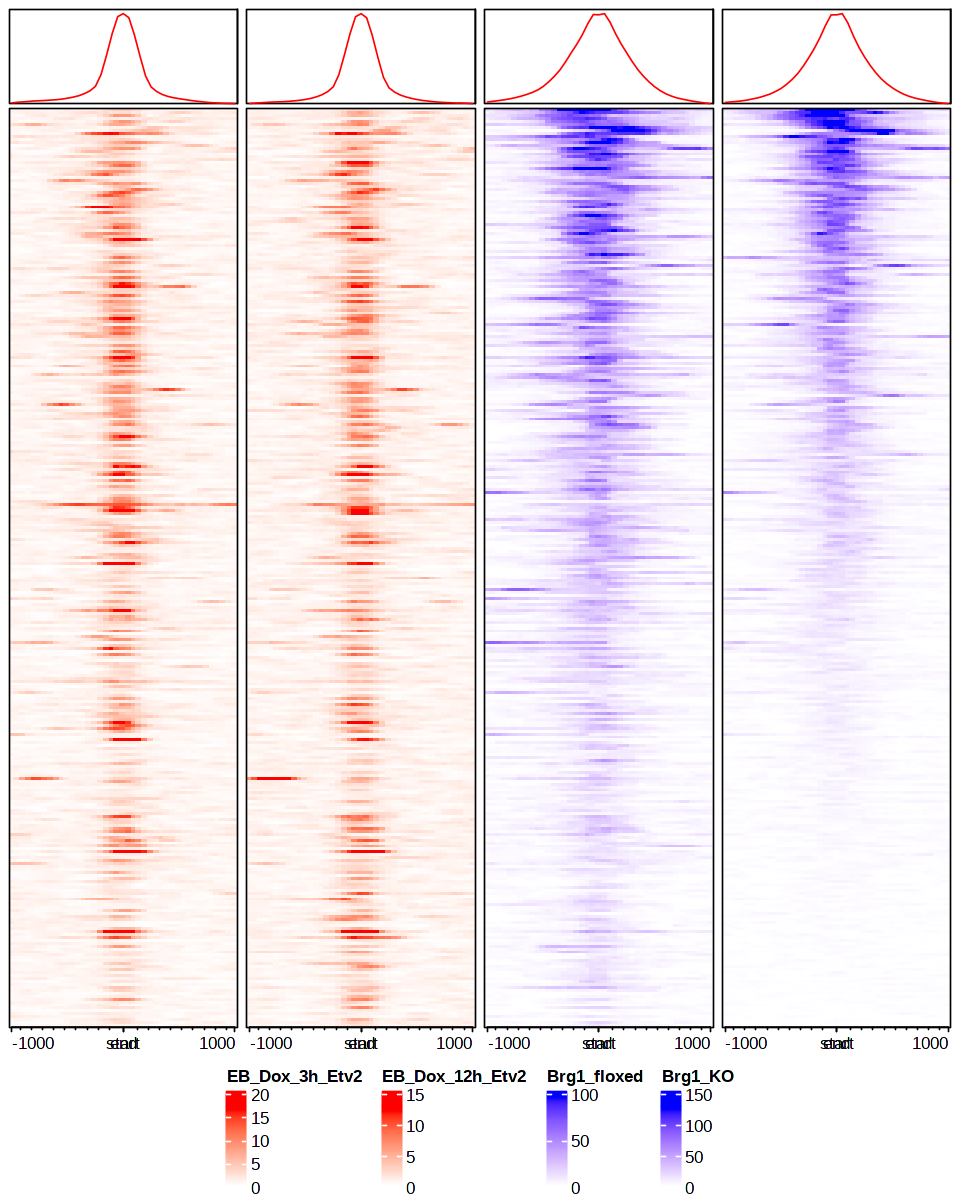

In [17]:
ta <- HeatmapAnnotation(
  enriched = anno_enriched(
    #gp = gpar(lty = 1, lwd = 2, col = 1:nlevels(sp)), 
    axis_param = list(facing = 'inside', at = -1000)
    #ylim = c(0, 45)
  )
)
h <- 
  EnrichedHeatmap(
  mat[['EB_Dox_3h_Etv2']][i,],
  col = col_fun[['EB_Dox_3h_Etv2']],
  row_order = order(enriched_score(mat[['Brg1_KO']][i,]), decreasing = TRUE), 
  #split = sp[i], 
  name = 'EB_Dox_3h_Etv2', 
  top_annotation = ta, 
  pos_line = FALSE
)
ss <- c(
  'EB_Dox_12h_Etv2', 'Brg1_floxed', 'Brg1_KO'
)
for (s in ss[ss %in% names(bw_files)]){
  h <- h + EnrichedHeatmap(mat[[s]][i, ], col = col_fun[[s]], name = s, top_annotation = ta, pos_line = FALSE)
}
options(repr.plot.width = 8, repr.plot.height = 10)
draw(h, heatmap_legend_side = 'bottom')

We see that KO loses the Etv2 binding sites when compared to the control.

In [18]:
Sys.time() - start_time0

Time difference of 34.34106 mins

In [19]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] EnrichedHeatmap_1.21.2             ComplexHeatmap_2.9.4              
 [3] stringr_1.4.0                      dplyr_1.0.7                       
 [5] plyr_1.8.6                         circlize_0.4.13                   
 [7] gplo